Cho tập dữ liệu Wine Quality

1. Đọc dữ liệu , sau đó hiển thị 5 dòng đầu tiên, thông tin về dữ liệu, thống kế mô tả.
2. Phân tích khám phá dữ liệu
2.1 Kiểm tra giá trị thiếu
2.2 Vẽ histogram cho tất cả các biến và nhân xét
2.3 vẽ boxplot cho tất cả các biến và nhận xét
2.4 Vẽ Scatterplot cho "alcohol" và "quality"
3. Tính toán ma trận tương quan và vẽ heat map của ma trận tương quan đó 
4. Chia tập dữ liệu thủ công không dùng thư viên có sẵn
4.1 Xáo trộn dữ liệu
4.2 Chia dữ liệu với 80% huấn luyện
4.3 Tách dữ lieuyej
4.4 Tách đặc trưng các nhãn

5. Chuẩn bị dữ liệu 
5.1 Khởi tạo bộ dữ liệu chuẩn hóa 
5.2 Chuẩn hóa huấn luyện
5.3 Chuẩn hóa kiểm tra 

6. Ứng dụng mô hình hồi quy tuyeenns tính
6.1 Khởi tạo
6.2 Huấn luyện
6.3 Dự đoán trên tập kiểm tra.

7. Đánh giá mô hình. 

Tính MSE và R^2

import 

5 dòng đầu :
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      

<Figure size 1200x800 with 0 Axes>

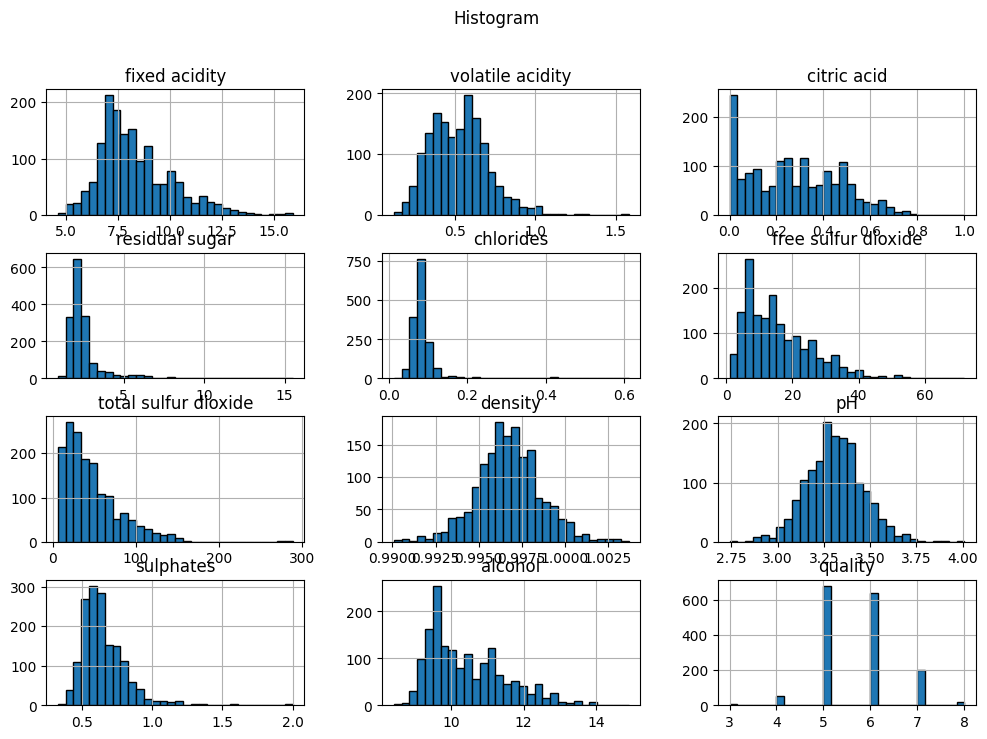

Nhận xét:
Biến alcohol có thể có phân bố lệch phải.
tức là có nhiều giá trị nhỏ và một số ít giá trị lớn
Nếu biến volatile acidity có một số giá trị rất cao so với phần còn lại, có thể có ngoại lệ trong dữ liệu.


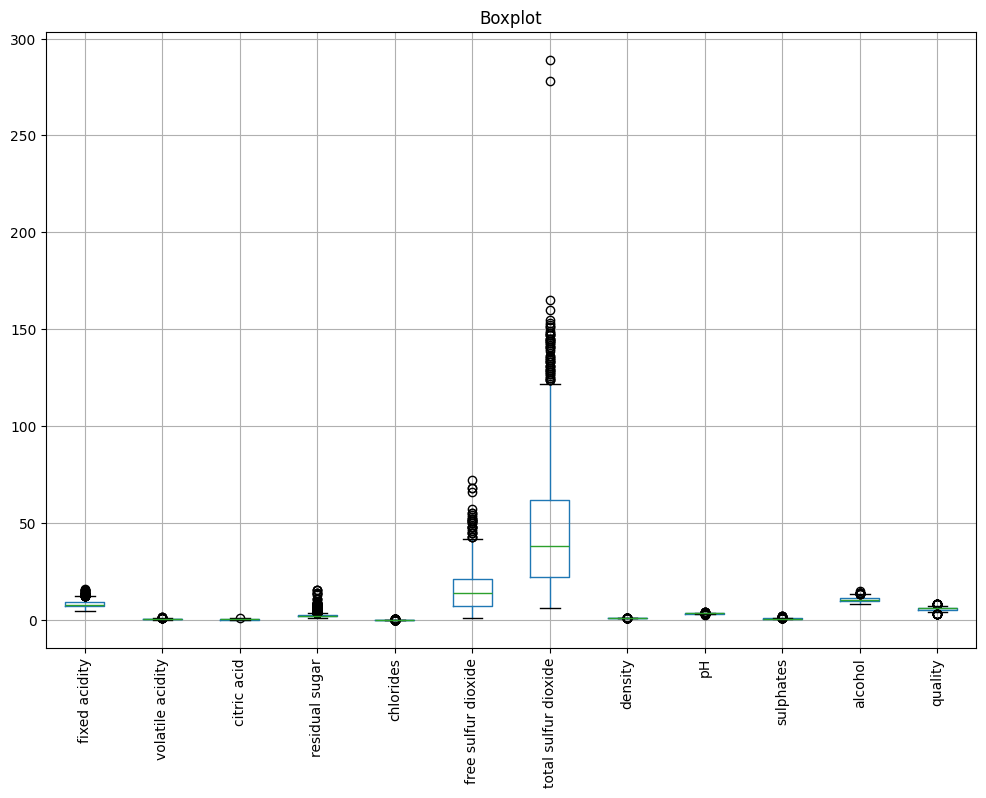

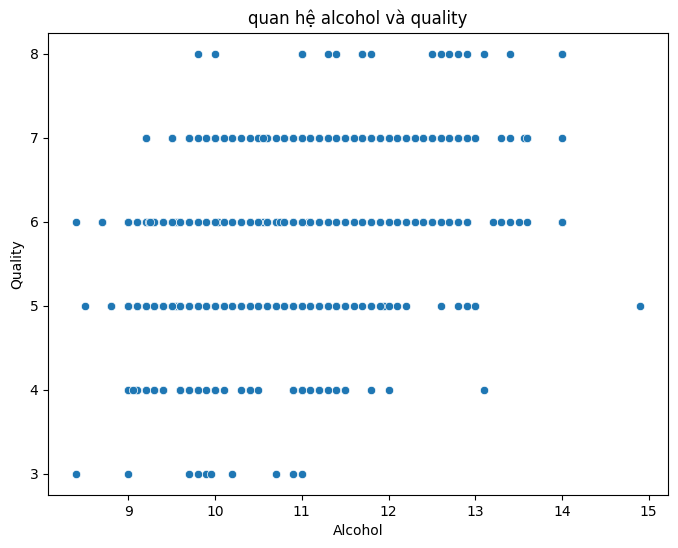

In [19]:

# CÂU 1 VÀ CÂU 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 
df = pd.read_csv("winequality-red.csv", sep=';')
print("5 dòng đầu :")
print(df.head())
print("\nThông tin :")
print(df.info())
print("\nTk mô tả:")
print(df.describe())


# 2. 

# 2.1 
print("\n giá trị thiếu mỗi cột:")
print(df.isnull().sum())

# 2.2 
plt.figure(figsize=(12, 8))
df.hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histogram")
plt.show()
print("Nhận xét:\nBiến alcohol có thể có phân bố lệch phải.\ntức là có nhiều giá trị nhỏ và một số ít giá trị lớn\nNếu biến volatile acidity có một số giá trị rất cao so với phần còn lại, có thể có ngoại lệ trong dữ liệu.")
# 2.3 
plt.figure(figsize=(12, 8))
df.boxplot(rot=90)
plt.title("Boxplot")
plt.show()

# 2.4 
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['alcohol'], y=df['quality'])
plt.title("quan hệ alcohol và quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.show()

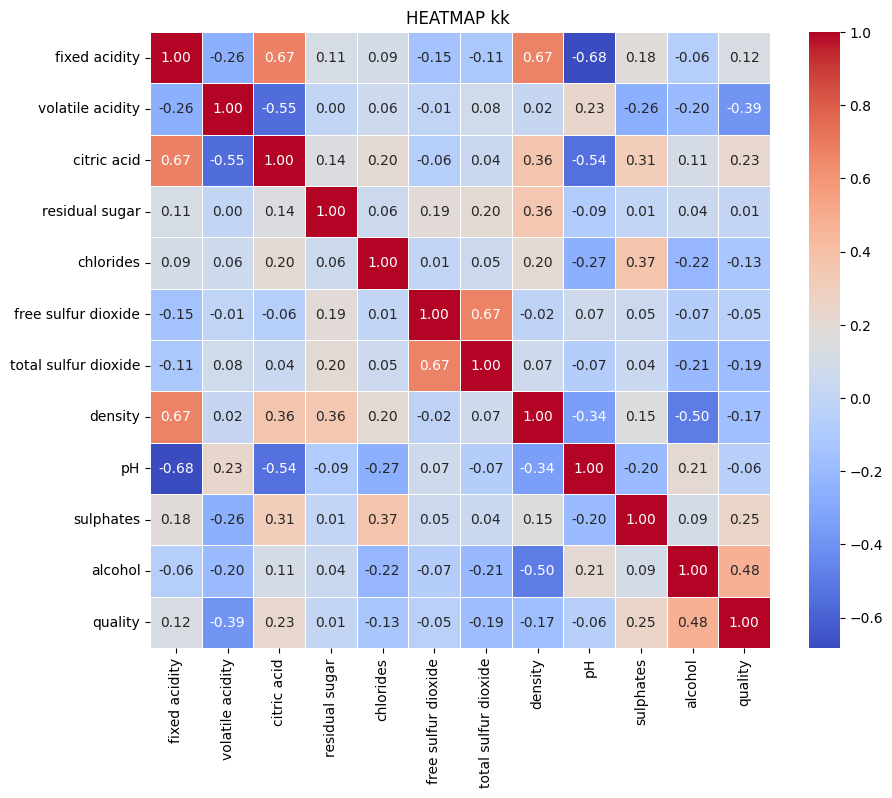

In [13]:
# 3. Tính toán ma trận tương quan và vẽ heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("HEATMAP kk ")
plt.show()


In [ ]:
#CÂU 4
# 4.
from sklearn.utils import shuffle
# 4.1
df = shuffle(df, random_state=42)
# 4.2
train_s     
test_size = 1 - train_size
df_train = df[:train_size]
df_test = df[train_size:]
# 4.3
y_train = df_train['quality']
X_train = df_train.drop(columns=['quality'])
y_test = df_test['quality']
X_test = df_test.drop(columns=['quality'])

print("\nKích thước tập huấn luyện:", X_train.shape, y_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape, y_test.shape)



Kích thước tập huấn luyện: (1279, 11) (1279,)
Kích thước tập kiểm tra: (320, 11) (320,)


In [15]:
#CÂU 5
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
#CÂU 6
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

#CÂU 7
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')



MAE: 0.43873226312003916
MSE: 0.35008178598506495


In [17]:
#CÂU 8
from sklearn.metrics import r2_score
# Tính R^2
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2}')

R^2: 0.4223966408083486


BTVN:
1. Cho bộ dữ liệu howlongwelive:
2.1 tôi muốn biết có bao nhiêu cột và bao nhiêu hàng.
(dùng lệnh)
2.2 Tôi muốn biết danh sách của các hàng
